# Práctica 2 - Multy Layered Perceptron
## Introducción

El Perceptrón Multicapa (MLP) se denomina una red neuronal multicapa totalmente conectada.

Tiene 3 capas, incluida una capa oculta. Si tiene más de 1 capa oculta, se denomina una red neuronal profunda. Un MLP es un ejemplo típico de una red neuronal *feedforward*.

El número de capas y el número de neuronas se conocen como hiperparámetros de una red neuronal, y estos necesitan ajuste. Se deben utilizar técnicas de validación cruzada para encontrar valores ideales para estos.<sup>[1][1]</sup>

![MLP Neural Network](https://www.researchgate.net/profile/Manouchehr_Shokri/publication/339032619/figure/download/fig1/AS:854994186170369@1580857907467/Structure-of-typical-MLP-artificial-neural-network.ppm "MLP Neural Network")

### Modelo Predictivo

En esta práctica, la Función de Activación es, de nuevo, un **Hard Limiter** (o Función Escalón, en este caso, tenemos 2: ReLU<sup>[2][2]</sup> y sigmoide<sup>[3][3]</sup>) cuya expresión general será:

> ReLu:
>
> $$ \begin{equation*}{F(S,\theta)} = \begin{cases}F, \text{si } F >=0\\0, \text{si } F < 0 \end{cases}\end{equation*}$$
>
> Sigmoide
> $$ \begin{equation*}{F(S,\theta)} = \frac{1}{1 + e^{-S}}\end{equation*}$$
>

### Optimizer
El aprendizaje en este caso, en vez de seguir la **Regla Delta Generalizada**, tomaremos **Adam**<sup>[4][4]</sup> como función de modificación:

<br>

Adam:

> $${\displaystyle m_{t}=\beta _{1}*m_{t}+(1-\beta _{1})*(\delta L/\delta w_{t})}$$

<center>y</center>

> $${\displaystyle v_{t}=\beta _{2}*v_{t}+(1-\beta _{2})*(\delta L/\delta w_{t})^{2}}$$

Inicialmente, tanto ${mt}$ como ${vt}$ se establecen en 0. Ambos tienden a estar más sesgados hacia 0, ya que ${\beta_{1}}$ y ${\beta_{2}}$ son iguales a 1. Al calcular con corrección de sesgo ${\displaystyle {\hat {m_{t}}}}{\displaystyle {\hat {m_{t}}}}$ y ${\displaystyle {\hat {v_{t}}}}{\displaystyle {\hat {v_{t}}}}$, el optimizador de Adam corrige este problema. Las ecuaciones son las siguientes

> $${\displaystyle {\hat {m_{t}}}=m_{t}\div (1-\beta _{1}^{t})}{\displaystyle {\hat {m_{t}}}=m_{t}\div (1-\beta _{1}^{t})}$$
>
> $${\displaystyle {\hat {v_{t}}}=v_{t}\div (1-\beta _{2}^{t})}{\displaystyle {\hat {v_{t}}}=v_{t}\div (1-\beta _{2}^{t})}$$

Ahora nos estamos acostumbrando al descenso de gradiente después de cada iteración y, por tanto, permanece controlado e imparcial. Ahora sustituimos los nuevos parámetros en por antiguos. Obtenemos;

> $${\displaystyle w_{t}=w(t-1)-\alpha *({\hat {m_{t}}}/{\sqrt {(}}{\hat {v_{t}}})+e)}$$

El pseudocódigo para el optimizador de Adam se proporciona a continuación:

> **While** w(t) no converge **do**:
>
> ${\displaystyle t=t+1.}{\displaystyle t=t+1.}$
>
> ${\displaystyle m_{t}=\beta _{1}*m_{t}+(1-\beta _{1})*(\delta L/\delta w_{t})}$
>
> ${\displaystyle v_{t}=\beta _{2}*v_{t}+(1-\beta _{2})*(\delta L/\delta w_{t})^{2}}$
>
> ${\displaystyle {\hat {m_{t}}}=m_{t}\div (1-\beta _{1}^{t})}{\displaystyle {\hat {m_{t}}}=m_{t}\div (1-\beta _{1}^{t})}$
>
> ${\displaystyle {\hat {v_{t}}}=v_{t}\div (1-\beta _{2}^{t})}{\displaystyle {\hat {v_{t}}}=v_{t}\div (1-\beta _{2}^{t})}$
>
> ${\displaystyle w_{t}=w(t-1)-\alpha *({\hat {m_{t}}}/{\sqrt {(}}{\hat {v_{t}}})+e)}$
>
> **end**

<br>

Error (Mean Squared Error):

> $$ e = \frac{({Y_t} - {d_t})^2}{n} $$

<!-- Referencias Introductorias -->

[1]: <https://www.simplilearn.com/tutorials/deep-learning-tutorial/multilayer-perceptron> "MLP"
[2]: <https://iq.opengenus.org/relu-activation/> "ReLU"
[3]: <https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function#:~:text=A%20sigmoid%20function%20is%20a%20type%20of%20activation,these%20functions%20useful%20in%20the%20prediction%20of%20probabilities.> "Sigmoide"
[4]: <https://optimization.cbe.cornell.edu/index.php?title=Adam> "Adam"

## Implementación
### Importar librerías de código

En nuestro caso hemos reducido al mínimo el número de librerías de código a utilizar para esta práctica; en nuestro caso utilizamos las siguientes:

- <ins>Tensorflow</ins> &rarr; TensorFlow es una biblioteca de software gratuita y de código abierto para el aprendizaje automático y la inteligencia artificial. Utilizamos Tensorflow para:
  - Modelos de Keras:
    - Creación 🧠
    - Entrenamiento 🏋
    - Validación ✅
  - Visualización de modelos 📊
- <ins>IPython</ins> &rarr; IPython es un shell de comandos para computación interactiva en múltiples lenguajes de programación, desarrollado originalmente para el lenguaje de programación Python. Utilizamos IPython para:
  - Creación y visualización de imágenes 🖼
- <ins>Numpy</ins> &rarr; Es una librería numérica que trae el poder computacional de lenguajes como C y Fortran a Python. Utilizamos Numpy para:
  - Utilizar arrays 🔲
  - Generar números aleatorios 🔢
  - Generar arrays a partir de distribuciones numéricas 📶
- <ins>Pandas</ins> &rarr; Es una librería de manipulación y análisis de datos de código abierto rápida, potente, flexible y fácil de usar, construida sobre el lenguaje de programación Python. Usamos Pandas para:
  - Abrir archivos .csv 📂
  - Dataframes 📅
- <ins>Matplotlib</ins> &rarr; Es una librería para crear visualizaciones estáticas, animadas e interactivas en Python. Usamos Matplotlib para:
  - Mostrar gráficos 📊
  - Tipo de renderizado `inline`

In [ ]:
print('Versiones de las librerías con las que vamos a trabajar:')
# Librerías para redes neuronales
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.keras import layers as ly
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
print('\tTensorflow y Keras\t>>> \tv', tf.__version__)

# !conda install -c anaconda graphviz
# !conda install -c conda-forge pydot
# ^ para ks.utils.plot_model ^

# Librería numnérica
import numpy as np
print('\tNumpy\t\t\t>>> \tv', np.__version__)
# Librerías para estructuras de datos
import pandas as pd
print('\tPandas\t\t\t>>> \tv', pd.__version__)
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
print('\tSklearn\t\t\t>>> \tv', sk.__version__)
# Librería gráfica
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline
print('\tMatplotlib\t\t\t>>> \tv', mplt.__version__)
# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')



Versiones de las librerías con las que vamos a trabajar:
	Tensorflow y Keras	>>> 	v 2.11.0
	Numpy			>>> 	v 1.22.4
	Pandas			>>> 	v 1.4.4
	Sklearn			>>> 	v 1.2.2


### Preparamos las variables para el XOR

Volviendo a ver lo que hemos visto en la práctica anterior (el archivo L2P1_Perceptron.ipynb), las entradas son:

| $x_{1}$ | $x_{2}$ | $y$ |
|---------|---------|-----|
| 0       | 0       | 0   |
| 0       | 1       | 1   |
| 1       | 0       | 1   |
| 1       | 1       | 0   |




In [ ]:
# Epochs
iters = np.array(range(5,101,5))
print('Iteraciones:\n', iters)
# Matriz que almacena las posibles entradas de una función lógica
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
print('\nEntradas:\n', entradas)
# Vector de salidas esperadas de la función XOR
salidas = np.array([[0], [1], [1], [0]])
print('\nSalidas:\n', salidas)

Iteraciones:
 [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]

Entradas:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

Salidas:
 [[0]
 [1]
 [1]
 [0]]


### Número de Neuronas

- Entrada > Tantas como patrones de entrada (XOR = 2)
- Salida > Tantas como salidas esperadas (XOR = 1)
- Totales > Menor que el número de patrones de entrenamiento
- Intermedia > Muchas overfitting y pocas underfitting; y, empíricamente, $\frac{M}{2N}<n<\frac{2M}{N}$; donde M es el número de ejemplos y N de neuronas en la capa de entrada


In [ ]:
# Generamos el rango en el que trabajaremos las neuronas
neuronas = range(int(entradas.shape[0]/(2*entradas.shape[1]))+1,int((2*entradas.shape[0])/entradas.shape[1]))
neuronas = np.array(neuronas)
# Posibles funciones de activación
funciones_activacion = ['relu','sigmoid']

### Configuración de modelos

In [ ]:
# Como tenemos 4 patrones de entrenamiento, el valor de la capa intermedia
# (o capa oculta) solo puede ser 2 o 3, como nos da la fórmula empírica vista
# arriba
def _createModel(n:int, f_a_hidden:str, f_a_output:str):
    # Creamos un modelo Secuencial con capas "Fully Connected" (Dense) para crear la
    # estructura del Perceptron Multicapa
    modelo_MLP = ks.models.Sequential([
        ly.InputLayer(input_shape=(entradas.shape[1],), name='Input_Layer'), # Capa de entrada con la forma del número de clases del dataset de entradas (la función lógica)
        ly.Dense(n, activation=f_a_hidden, name='Hidden_Layer'), # Unas sola capa oculta basandonos en el Teorema de Aproximación Universal con las neuronas vistas anteriormente
        ly.Dense(salidas.shape[1], activation=f_a_output, name='Output_Layer') # Una capa de salida con con la forma del número de columnas del dataset de salidas (la función lógica)
    ], name=str(n) + 'nH' + f_a_hidden + 'O' + f_a_output) # Nombramos el modelo acorde a su configuración 'Num_Neuronas'n'Func_Activación_Hidden'H'Func_Activación_Output'O
    return modelo_MLP

# Creamos una lista para almacenar los modelos
modelos_MLP = []
print('Configurar Modelos (podemos ver los modelos en la carpeta Visualizar_Modelos)\n=================================================================')
# Creamos los modelos con las diferentes configuraciones obtenidas previamente
for i in range(0,len(neuronas)):
    for j in range(0, len(funciones_activacion)):
        for k in range(0, len(funciones_activacion)):
            # Almacenamos el modelo configurado
            modelos_MLP.append(_createModel(neuronas[i],funciones_activacion[j],funciones_activacion[k]))

# Mostramos los datos de los modelos y creamos visualizaciones de los mismos
for n in range(0, len(modelos_MLP)):
    modelos_MLP[n].summary()
    # Creamos la imágen
    """ks.utils.plot_model(
        modelos_MLP[n],
        to_file='Visualizar_Modelos/model_'+ str(n) +'.png',
        show_shapes=True,
        show_layer_names=True,
        expand_nested=True,
        dpi=100,
        show_layer_activations=True, # Funcionará si la versión de tensorflow es superior a v2.7.0, recomendado dejar comentado
        )"""
    print('\n=================================================================\n')


Configurar Modelos (podemos ver los modelos en la carpeta Visualizar_Modelos)
Model: "2nHreluOrelu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 2)                 6         
                                                                 
 Output_Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Model: "2nHreluOsigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 2)                 6         
                                                                 
 Output_Layer (Dense)        (None, 1)                 3         
                     

### Preparación para el entrenamiento de los modelos

Utilizamos el optimizador Adam y para el optimizador dejamos los valores por defecto; centrandonos en buscar la mejor combinación para un modelo de:

   - Épocas (epoch) o iteraciones
   - Número de neuronas
   - Funciones de activación

In [ ]:
# Optimizador Adam con configuración por defecto
opt = ks.optimizers.legacy.Adam()
# Función de error de Mean Sqared Error
error = ks.losses.MeanSquaredError()

### Introducimos la configuración del modelo para el entrenamiento

In [ ]:
# Conpilamos los modelos con el optimizador y error anterior
for i in range(0, len(modelos_MLP)):
          modelos_MLP[i].compile(optimizer=opt, loss=error, metrics=['accuracy'])

### Entrenar, evaluar y predecir

En esta celda, entrenamos el modelo para cada uno de los posibles valores que puede tener (en cuanto lo mencionado anteriormente) con `model.fit()`

Cuando entrenamos un modelo, además:

  - Lo evaluamos con `model.evaluate()`
  - Predecimos nuevos valores `model.predict()`

Cabe decir que, en el caso de este dataset, no dividimos el mismo entre datos de entrenamiento y de validación debido a la poca cantidad de ejemplos con los que contamos.

In [ ]:
model = _createModel(3,'relu', 'sigmoid')
model.compile(optimizer=opt, loss=error, metrics=['accuracy'])
history = model.fit(x=entradas, y=salidas, batch_size=entradas.shape[0], epochs=10)
model.evaluate(x=entradas, y=salidas, batch_size=entradas.shape[0])
model.predict(x=entradas, batch_size=entradas.shape[0])
history.history['loss']

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.3324 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 0.3319 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 0.3313 - accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3308 - accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3302 - accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3297 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 0.3291 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 14ms/step - loss: 0.3286 - accuracy: 0.2500
Epoch 9/10
1/1 [==============================] - 0s 20ms/step - loss: 0.3280 - accuracy: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 208ms/step


[0.33239951729774475,
 0.33185216784477234,
 0.33130520582199097,
 0.33075857162475586,
 0.3302123248577118,
 0.3296664357185364,
 0.329120934009552,
 0.32857581973075867,
 0.32803112268447876,
 0.32748690247535706]

In [ ]:
# Preparo para guardar los modelos
# Guardo el entrenamiento
m_tr = []
# Guardo la evaluación
m_ev = []
# Guardo las predicciones
m_pr = []
# Entrenamos los modelos para todos los modelos creados y para todas las iteraciones planteadas
for i in range(0, len(modelos_MLP)):
        for j in range(0, len(iters)):
            # Mostramos el progreso del modelo
            print('Para el modelo ' + str(i+1) + 'º con ' + str(iters[j]) + ' epochs')
            m_tr.append(modelos_MLP[i].fit(x=entradas, y=salidas, batch_size=entradas.shape[0], epochs=iters[j])) # Entrenamos
            m_ev.append(modelos_MLP[i].evaluate(x=entradas, y=salidas, batch_size=entradas.shape[0])) # Evaluamos
            m_pr.append(modelos_MLP[i].predict(x=entradas, batch_size=entradas.shape[0])) # Predecimos
            print('=====================================================================')

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 25ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 59/85
1/1 [==============================] - 0s 28ms/step - loss: 0.0277 - accuracy: 1.0000
Epoch 60/85
1/1 [==============================] - 0s 30ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 61/85
1/1 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 1.0000
Epoch 62/85
1/1 [==============================] - 0s 6ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 63/85
1/1 [==============================] - 0s 62ms/step - loss: 0.0275 - accuracy: 1.0000
Epoch 64/85
1/1 [==============================] - 0s 12ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 65/85
1/1 [==============================] - 0s 19ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 66/85
1/1 [==============================] - 0s 20ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 67/85
1/1 [==============================] - 0s 25ms/step - loss:

Menor error [119]: 0.01694938912987709
[[0.15503494]
 [0.9206464 ]
 [0.8841169 ]
 [0.15503494]]



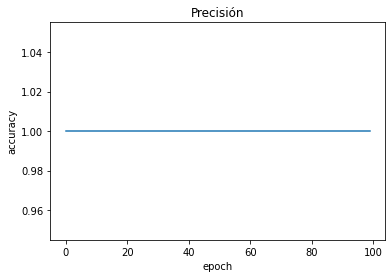

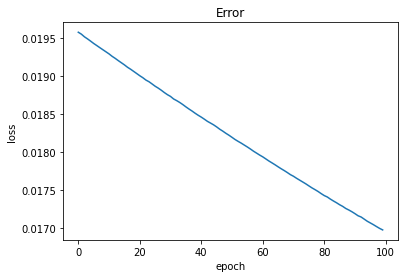



Modelo con la mayor precisión

Model: "3nHsigmoidOsigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 3)                 9         
                                                                 
 Output_Layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________




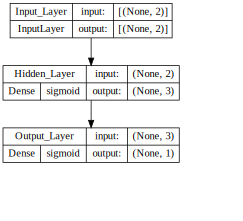

Mayor precisión [104]: 1.0
[[0.41992724]
 [0.7805375 ]
 [0.5023544 ]
 [0.43202   ]]



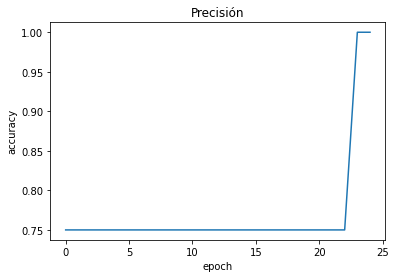

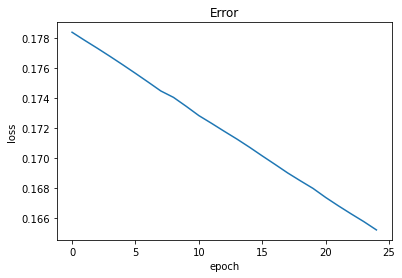



Modelo con el error mínimo

Model: "2nHreluOrelu"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 2)                 6         
                                                                 
 Output_Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________




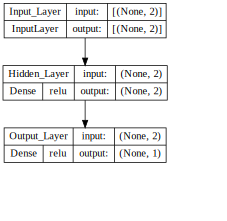

Patron más parecido [119]
[[0.15503494]
 [0.9206464 ]
 [0.8841169 ]
 [0.15503494]]



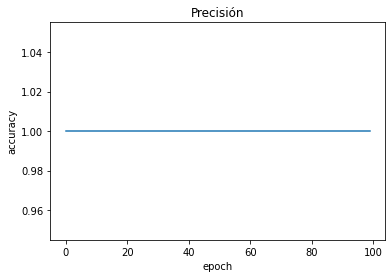

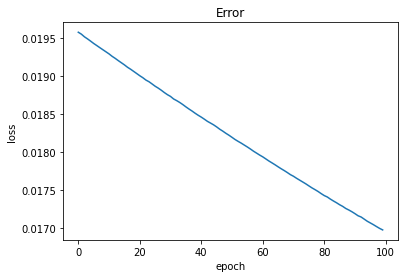



Modelo con la predicción más parecida

Model: "3nHsigmoidOsigmoid"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer (Dense)        (None, 3)                 9         
                                                                 
 Output_Layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________




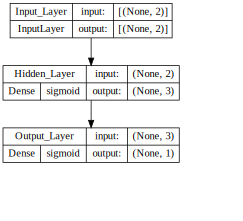

,Iteraciones,Neuronas,Salida,Error,Configuración
0,5.0,2.0,"[[0.005649813450872898], [0.4390484690666199],...",0.336104,"[relu, relu]"
1,10.0,2.0,"[[0.021755153313279152], [0.44149813055992126]...",0.330586,"[relu, relu]"
2,15.0,2.0,"[[0.04698999971151352], [0.4456677734851837], ...",0.322351,"[relu, relu]"
3,20.0,2.0,"[[0.07840099185705185], [0.4515784978866577], ...",0.312806,"[relu, relu]"
4,25.0,2.0,"[[0.11369755864143372], [0.45896583795547485],...",0.302969,"[relu, relu]"
5,30.0,2.0,"[[0.1512230634689331], [0.4671897888183594], [...",0.293474,"[relu, relu]"
6,35.0,2.0,"[[0.18957825005054474], [0.47563135623931885],...",0.284756,"[relu, relu]"
7,40.0,2.0,"[[0.2275083065032959], [0.48381274938583374], ...",0.277100,"[relu, relu]"
8,45.0,2.0,"[[0.2639109492301941], [0.4913235902786255], [...",0.270646,"[relu, relu]"
9,50.0,2.0,"[[0.2978973388671875], [0.4978470206260681], [...",0.265403,"[relu, relu]"


In [ ]:
# Separamos la evaluación en las 2 categorías que analizamos (error y precisión)
m_loss, m_acc = zip(*m_ev)

# Encontramos el error más baj0
min_loss = m_loss.index(min(m_loss))
print('Menor error [' + str(min_loss) + ']: ' + str(m_loss[min_loss]))
print(m_pr[min_loss])
print('\n=========================')
plt.plot(m_tr[min_loss].history['accuracy'])
plt.title('Precisión')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
plt.plot(m_tr[min_loss].history['loss'])
plt.title('Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
print('\nModelo con la mayor precisión\n')
modelos_MLP[min_loss%len(modelos_MLP)].summary()
print('\n')

display(SVG(model_to_dot(
    modelos_MLP[min_loss%len(modelos_MLP)],
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True).create(prog='dot', format='svg')))
print('=========================')
print('=========================')

# Encontramos la precisión más alta
max_acc = m_acc.index(max(m_acc))
print('Mayor precisión [' + str(max_acc) + ']: ' + str(m_acc[max_acc]))
print(m_pr[max_acc])
print('\n=========================')
plt.plot(m_tr[max_acc].history['accuracy'])
plt.title('Precisión')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
plt.plot(m_tr[max_acc].history['loss'])
plt.title('Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
print('\nModelo con el error mínimo\n')
modelos_MLP[max_acc%len(modelos_MLP)].summary()
print('\n')

display(SVG(model_to_dot(
    modelos_MLP[max_acc%len(modelos_MLP)],
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True).create(prog='dot', format='svg')))
print('=========================')
print('=========================')


# Para encontrar las salidas más parecidas a las esperadas realizamos la
# raiz cuadrada del sumatorio de la diferencia de cuadrados normalizada
m_pr = np.asarray(m_pr)
similares = np.sqrt(np.sum((m_pr / m_pr.sum(axis=1)[:, np.newaxis] - salidas / np.sum(salidas))**2, axis=1))
# Eliminiar NaN (obtenidos por divisiones entre 0) mediante hacerlos más grandes
# que 1 elemento
similares[np.isnan(similares)] = 1
result = m_pr[similares.argmin()]
# Conseguimos el index del patron más parecido
idx_result = int(np.argwhere(np.all(m_pr==result, axis=(1,2))))
print('Patron más parecido [' + str(idx_result) + ']')
print(result)
print('\n=========================')
plt.plot(m_tr[idx_result].history['accuracy'])
plt.title('Precisión')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
plt.plot(m_tr[idx_result].history['loss'])
plt.title('Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
print('\n=========================')
print('\nModelo con la predicción más parecida\n')
modelos_MLP[idx_result%len(modelos_MLP)].summary()
print('\n')

display(SVG(model_to_dot(
    modelos_MLP[idx_result%len(modelos_MLP)],
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True).create(prog='dot', format='svg')))
print('=========================')
print('=========================')

# Guardamos los datos del entrenamiento en la siguiente tabla
N = np.zeros(len(m_pr))
for i in range(0, len(m_pr)):
  if i < 80:
    N[i] = 2
  else:
    N[i] = 3

I = np.zeros(len(m_pr))
for j in range(0, len(modelos_MLP)):
  for k in range(0, len(iters)):
    I[(j*len(iters))+k] = iters[k]

neuronas = []
for j in range(0, len(modelos_MLP)):
  for k in range(0, len(iters)):
    current = []
    conf_act = j%4
    if conf_act == 0:
      current.append('relu')
      current.append('relu')
    elif conf_act == 1:
      current.append('relu')
      current.append('sigmoid')
    elif conf_act == 2:
      current.append('sigmoid')
      current.append('relu')
    else:
      current.append('sigmoid')
      current.append('sigmoid')
    neuronas.append(current)

col1 = pd.Series(I.tolist())
col2 = pd.Series(N.tolist())
col3 = pd.Series(m_pr.tolist())
col4 = pd.Series(list(m_loss))
d = {'Iteraciones': col1, 'Neuronas': col2, 'Salida': col3, 'Error': col4, 'Configuración': neuronas}
df = pd.DataFrame(d)
pd.set_option('display.max_rows', df.shape[0]+1)
df.to_csv("L2P2-XOR_Multicapa.csv", index = False)
df